## Detection of breast cancer with Artificial Neural Networks

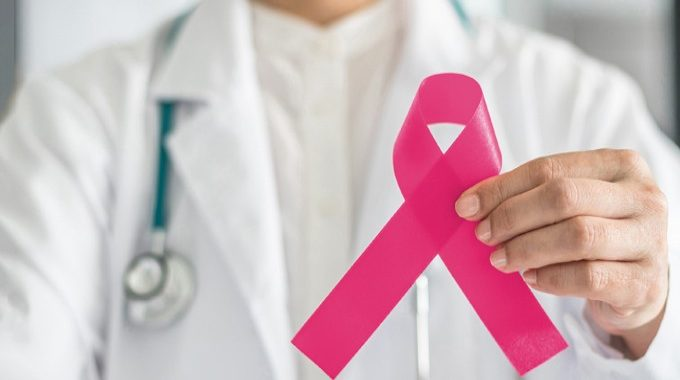

###### Dataset information:

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image, and can also be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

The dataset can be found on the `` Kaggle`` platform at the link below:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## 1. Imports from libraries

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import model_from_json

## 2. Starting...

In [2]:
df = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv", header = 0)
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df.head(3)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   
2  ...          25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  

[3 rows x 33 columns]

We have 30 columns present in the given dataset, 30 of which are characteristic variables (input data) the target variable (which we want our model to be able to predict).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

You can see that all variables are of type ``float64`` ("decimal" numbers).

Since all values in our dataset are numeric, we don't need to transform from "object" type to numeric type.

In [5]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

The ``describe()`` function generates a lot of information about numeric variables that can also be useful

Deleting the `id` and ``Unnamed: 32`` column:

In [6]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

#### Finding Missing Data (NaN)
Our dataset does not have missing values as it says on the UCI website, but just in case:

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

As expected, we have no missing values :D

In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
X = df[df.columns[1:]]
y = df["diagnosis"]

## 3. Construction of the model (Artificial neural networks)

The purpose of the Neural Networks algorithm is to imitate the nervous system of humans in the learning process, it is inspired by biological neural networks.

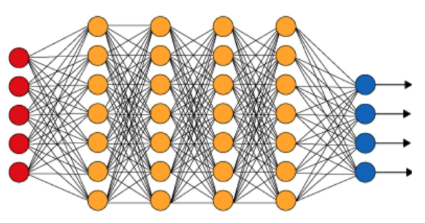

###### Artificial neural network parameters:
Link: https://keras.io/

Parameters of the `` RNA``:

     Sequential - Creation of a new neural network
     Dense - All connected neurons
     units - Number of neurons that are part of the hidden layer
     activation - Activation function that will be inserted
     input_dim - how many elements are there in the input layer
     Dropout - is used to decrease the chance of overfitting (20% of input neurons are zeroed)
    
``Compile`` parameters:

     optimizer - descent of the gradient and descent of the stochastic gradient
     loss - Loss function (binary_crossentropy as there is only one exit)
     metrics - Evaluation metrics (obs - more than one can be placed)

In [10]:
def createModel():
    classifier = Sequential()
    # input layer
    classifier.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal', input_dim = 30))
    classifier.add(Dropout(0.2))
    # hidden layer
    classifier.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal'))
    classifier.add(Dropout(0.2))
    # output layer
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    # compile
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
    return classifier

###### Network Creation Parameters

     build_fn - Neural network build function
     epochs - the number of times the weights will be adjusted
     batch_size - error calculation every 10 records

###### Cross Validation Parameters

     estimator - Neural network creation function
     X - Predictive attributes
     y - Output class
     cv - Number of test times (10 database divisions)
     scoring - return of results

In [11]:
classifier = KerasClassifier(build_fn = createModel, epochs = 250, batch_size = 10)
results = cross_val_score(estimator = classifier,
                             X = X, y = y,
                             cv = 10, scoring = 'accuracy')

Epoch 1/250
52/52 [==============================] - 1s 1ms/step - loss: 1.6774 - binary_accuracy: 0.5321
Epoch 2/250
52/52 [==============================] - 0s 1ms/step - loss: 0.7499 - binary_accuracy: 0.4820
Epoch 3/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6843 - binary_accuracy: 0.6469
Epoch 4/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6210 - binary_accuracy: 0.7288
Epoch 5/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5265 - binary_accuracy: 0.8109
Epoch 6/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4696 - binary_accuracy: 0.8726
Epoch 7/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4283 - binary_accuracy: 0.8852
Epoch 8/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3726 - binary_accuracy: 0.8691
Epoch 9/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3860 - binary_accuracy: 0.8693
Epoch 10/250
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/250
52/52 [==============================] - 1s 1ms/step - loss: 3.8962 - binary_accuracy: 0.5655
Epoch 2/250
52/52 [==============================] - 0s 1ms/step - loss: 0.7352 - binary_accuracy: 0.4414
Epoch 3/250
52/52 [==============================] - 0s 1ms/step - loss: 0.7421 - binary_accuracy: 0.5168
Epoch 4/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6807 - binary_accuracy: 0.4950
Epoch 5/250
52/52 [==============================] - 0s 1ms/step - loss: 0.7026 - binary_accuracy: 0.5284
Epoch 6/250
52/52 [==============================] - 0s 1ms/step - loss: 0.7011 - binary_accuracy: 0.5552
Epoch 7/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6605 - binary_accuracy: 0.6257
Epoch 8/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6567 - binary_accuracy: 0.5892
Epoch 9/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6188 - binary_accuracy: 0.6492
Epoch 10/250
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/250
52/52 [==============================] - 1s 1ms/step - loss: 1.9129 - binary_accuracy: 0.4778
Epoch 2/250
52/52 [==============================] - 0s 974us/step - loss: 0.6761 - binary_accuracy: 0.5146
Epoch 3/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6367 - binary_accuracy: 0.6691
Epoch 4/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5991 - binary_accuracy: 0.7894
Epoch 5/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5722 - binary_accuracy: 0.7865
Epoch 6/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5387 - binary_accuracy: 0.8031
Epoch 7/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5106 - binary_accuracy: 0.8485
Epoch 8/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5066 - binary_accuracy: 0.8226
Epoch 9/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4709 - binary_accuracy: 0.8201
Epoch 10/250
52/52 [========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/250
52/52 [==============================] - 1s 1ms/step - loss: 0.7607 - binary_accuracy: 0.5650
Epoch 2/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5528 - binary_accuracy: 0.8175
Epoch 3/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4891 - binary_accuracy: 0.8907
Epoch 4/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4669 - binary_accuracy: 0.9042
Epoch 5/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4424 - binary_accuracy: 0.8811
Epoch 6/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4067 - binary_accuracy: 0.8970
Epoch 7/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3749 - binary_accuracy: 0.9025
Epoch 8/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3707 - binary_accuracy: 0.9141
Epoch 9/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3369 - binary_accuracy: 0.9158
Epoch 10/250
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/250
52/52 [==============================] - 1s 1ms/step - loss: 0.7488 - binary_accuracy: 0.4155
Epoch 2/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6552 - binary_accuracy: 0.5329
Epoch 3/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6160 - binary_accuracy: 0.6939
Epoch 4/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6010 - binary_accuracy: 0.7479
Epoch 5/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5720 - binary_accuracy: 0.8175
Epoch 6/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5183 - binary_accuracy: 0.8646
Epoch 7/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5433 - binary_accuracy: 0.8331
Epoch 8/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5178 - binary_accuracy: 0.8520
Epoch 9/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5208 - binary_accuracy: 0.8442
Epoch 10/250
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/250
52/52 [==============================] - 1s 1ms/step - loss: 0.7010 - binary_accuracy: 0.6780
Epoch 2/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6878 - binary_accuracy: 0.6024
Epoch 3/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6857 - binary_accuracy: 0.5954
Epoch 4/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6898 - binary_accuracy: 0.5402
Epoch 5/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6767 - binary_accuracy: 0.6210
Epoch 6/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6816 - binary_accuracy: 0.5840
Epoch 7/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6787 - binary_accuracy: 0.5908
Epoch 8/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6718 - binary_accuracy: 0.6058
Epoch 9/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6747 - binary_accuracy: 0.5946
Epoch 10/250
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/250
52/52 [==============================] - 1s 1ms/step - loss: 0.7941 - binary_accuracy: 0.5499
Epoch 2/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5681 - binary_accuracy: 0.7783
Epoch 3/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4864 - binary_accuracy: 0.8225
Epoch 4/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4723 - binary_accuracy: 0.8408
Epoch 5/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4454 - binary_accuracy: 0.8366
Epoch 6/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3528 - binary_accuracy: 0.8882
Epoch 7/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3556 - binary_accuracy: 0.8666
Epoch 8/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3485 - binary_accuracy: 0.8743
Epoch 9/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3267 - binary_accuracy: 0.8879
Epoch 10/250
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/250
52/52 [==============================] - 1s 1ms/step - loss: 0.9663 - binary_accuracy: 0.4928
Epoch 2/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6117 - binary_accuracy: 0.6740
Epoch 3/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5710 - binary_accuracy: 0.6508
Epoch 4/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5166 - binary_accuracy: 0.7406
Epoch 5/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4330 - binary_accuracy: 0.8295
Epoch 6/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4653 - binary_accuracy: 0.7821
Epoch 7/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4291 - binary_accuracy: 0.7852
Epoch 8/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4112 - binary_accuracy: 0.8300
Epoch 9/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3766 - binary_accuracy: 0.8273
Epoch 10/250
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/250
52/52 [==============================] - 1s 1ms/step - loss: 1.3318 - binary_accuracy: 0.4969
Epoch 2/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6842 - binary_accuracy: 0.5924
Epoch 3/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6603 - binary_accuracy: 0.6220
Epoch 4/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6037 - binary_accuracy: 0.6796
Epoch 5/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5598 - binary_accuracy: 0.7641
Epoch 6/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4670 - binary_accuracy: 0.7880
Epoch 7/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4302 - binary_accuracy: 0.8125
Epoch 8/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3797 - binary_accuracy: 0.8077
Epoch 9/250
52/52 [==============================] - 0s 1ms/step - loss: 0.3514 - binary_accuracy: 0.8318
Epoch 10/250
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/250
52/52 [==============================] - 1s 1ms/step - loss: 5.9395 - binary_accuracy: 0.6109
Epoch 2/250
52/52 [==============================] - 0s 1ms/step - loss: 0.8803 - binary_accuracy: 0.4988
Epoch 3/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6161 - binary_accuracy: 0.4892
Epoch 4/250
52/52 [==============================] - 0s 1ms/step - loss: 0.6279 - binary_accuracy: 0.5940
Epoch 5/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5586 - binary_accuracy: 0.7692
Epoch 6/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5426 - binary_accuracy: 0.7947
Epoch 7/250
52/52 [==============================] - 0s 1ms/step - loss: 0.5187 - binary_accuracy: 0.8374
Epoch 8/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4775 - binary_accuracy: 0.8334
Epoch 9/250
52/52 [==============================] - 0s 1ms/step - loss: 0.4889 - binary_accuracy: 0.8443
Epoch 10/250
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
# Probability of each test
print(f'Results: {results}\nMean: {results.mean()}\nStandard Deviation: {results.std()}')

Results: [0.84210526 0.96491228 0.96491228 0.92982456 0.98245614 0.78947368
 0.96491228 0.98245614 0.96491228 0.92857143]
Mean: 0.9314536340852131
Standard Deviation: 0.061508401023446194
